Step 1: Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings("ignore")

Step 2: Load the dataset

In [16]:
data = pd.read_csv("WELFake_Dataset.csv")
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [104]:
data.shape

(72134, 3)

Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Class/Label (0 = fake and 1 = real).

In [17]:
data["text"][0] #label 1, Real News

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [18]:
data["text"][72130]

'You know, because in fantasyland Republicans never questioned the citizenship of America s first black president.But that s exactly what they did for years and Donald Trump led the charge by going on or calling into Fox News every chance he could in order to demand President Obama s birth certificate.It was Trump who constantly claimed President Obama was born in Kenya even though Hawaii newspapers from the time announce Obama s birth.Trump and his birther fans were finally utterly humiliated when President Obama released his birth certificate to the public.And now that birtherism is coming back to bite Trump on the ass as he tries to convince black voters that he isn t a racist.Part of the reason why black voters reject Trump is because he questioned the citizenship of President Obama simply because he is black. But Trump wants everyone to pretend he didn t say any nasty things about President Obama and Trump pawn Rudy Giuliani is demanding that Democrats apologize for Trump s birthe

In [19]:
data["text"][54320]

'BANGKOK (Reuters) - Thailand s government on Friday announced $2.2 billion in loans and handouts to help stabilize prices for rice farmers, a politically influential group whose heartland is in regions where opposition to the military junta is strongest. Thailand s staple food has long been a factor in its politics. The announcement by the commerce ministry came a week after former prime minister Yingluck Shinawatra fled into exile ahead of a court verdict in a criminal negligence case over a rice subsidy scheme that cost billions of dollars. The ministry said it would provide $1.57 billion in handouts to farmers and $633 million in loans that will cover 3.7 million households. The program will span the seasonal harvest from the start of November this year to the end of February 2018.  This is to help take 2 million tonnes of rice from the market,  Nuntawan Sakuntanaga, head of the commerce ministry s department of internal trade, told reporters. The government introduced similar shor

In [20]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

Step 3: Handle null values and separate features from labels.

In [23]:
data.fillna(" ", inplace=True)
features = data[["title", "text"]]
labels = data["label"]

In [24]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [26]:
label_Status = data["label"].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions, hole =.60, 
             title="Spam & Ham Status")
figure.show()

Step 4: Create word clouds

In [29]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)

fake_text = " ".join(data[data["label"] == 0]["text"])
real_text = " ".join(data[data["label"] == 1]["text"])

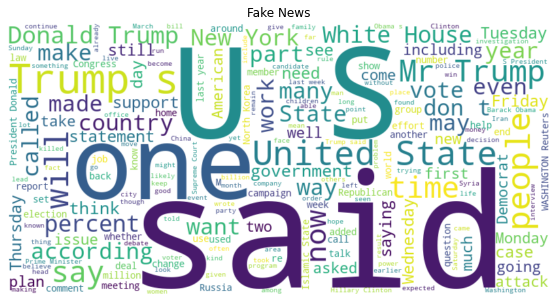

In [30]:
plot_wordcloud(fake_text, "Fake News")
plt.show()

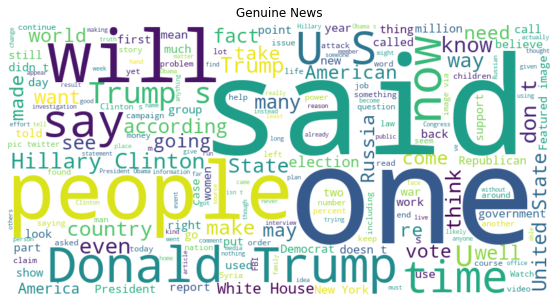

In [31]:
plot_wordcloud(real_text, "Genuine News")
plt.show()

Step 5: Text preprocessing

In [32]:
text_column = "text"
label_column = "label"

In [33]:
stopword = set(stopwords.words("english")) 
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = "".join(remove_punc) # char joining
    
    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words("english")
    return text

In [37]:
data[text_column] = data[text_column].apply(preprocess_text)

In [38]:
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

Step 6: Lemmatization

In [39]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [40]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

Step 7: TF-IDF Vectorization

In [41]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [42]:
x

<72134x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 14808111 stored elements in Compressed Sparse Row format>

Step 8: Split dataset into training and testing sets.

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.3, random_state=42)

Step 09: Evaluate Naive Bayes models.

In [56]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)
    
    return {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
    }

Step 10: Build Naive Bayes models.

Multinomial Naive Bayes

In [57]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [65]:
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [66]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.8765306593965159,
 'Confusion Matrix': array([[9711,  902],
        [1770, 9258]], dtype=int64)}

Evaluate Manually

In [67]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[9711,  902],
       [1770, 9258]], dtype=int64)

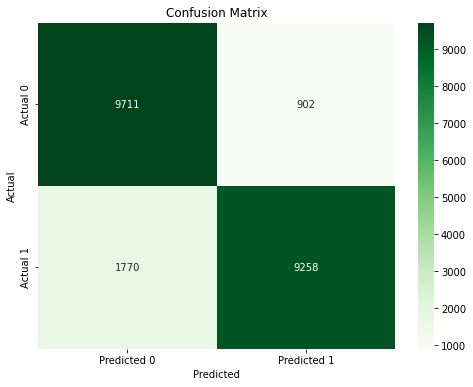

In [71]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



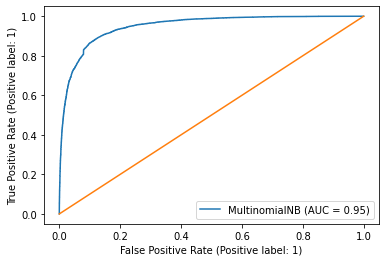

In [76]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(mnb_model, xtest, ytest)
plt.plot([0,1],[0,1])

Bernoulli Naive Bayes

In [77]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [78]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

{'Accuracy': 0.8547202070144633,
 'Confusion Matrix': array([[8573, 2040],
        [1104, 9924]], dtype=int64)}

In [79]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

array([[8573, 2040],
       [1104, 9924]], dtype=int64)

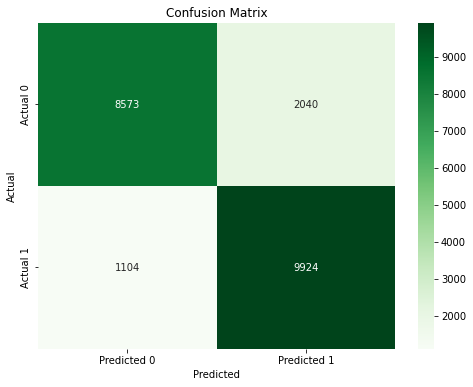

In [81]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [82]:
print(classification_report(ytest, bnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



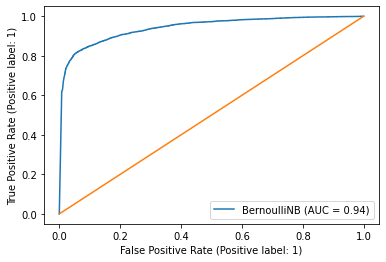

In [83]:
plot_roc_curve(bnb_model, xtest, ytest)
plt.plot([0,1],[0,1])

Step 11: Apply Logistic Regression.

In [84]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

Step 12: Evaluate Logistic Regression.

In [85]:
lr_results = evaluate_model(lr_model, xtest, ytest)

In [86]:
lr_results

{'Accuracy': 0.9512499422392681,
 'Confusion Matrix': array([[ 9975,   638],
        [  417, 10611]], dtype=int64)}

In [87]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))
cm_lr

array([[ 9975,   638],
       [  417, 10611]], dtype=int64)

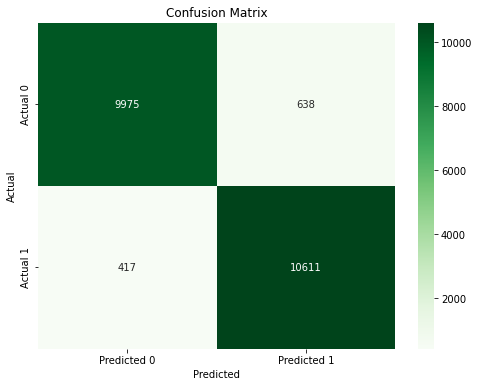

In [88]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

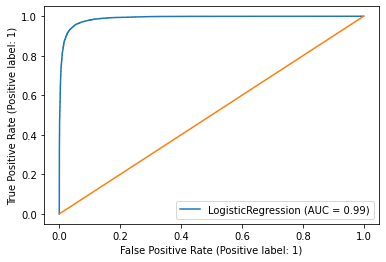

In [89]:
plot_roc_curve(lr_model, xtest, ytest)
plt.plot([0,1],[0,1])

Step 13: Visualize performance with histogram.

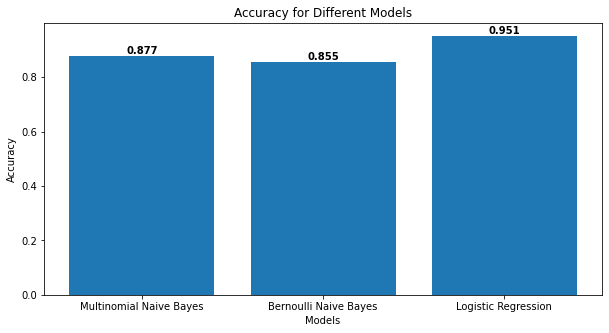

In [90]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} for Different Models")
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha="center", va="bottom", color="black", fontweight="bold")

    plt.show()

accuracy_values = [nb_results["Accuracy"], bnb_results["Accuracy"], lr_results["Accuracy"]]
model_names = ["Multinomial Naive Bayes", "Bernoulli Naive Bayes", "Logistic Regression"]
plot_histogram(accuracy_values, model_names, "Accuracy")

Step 14: Input random text and make a prediction

In [91]:
models = [mnb_model, bnb_model, lr_model]

In [92]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation 
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

In [93]:
preprocessed_text

['field',
 'AI',
 'research',
 'officially',
 'born',
 '1956',
 'Dartmouth',
 'Conference',
 'introduced',
 'term',
 '“artificial',
 'intelligence”',
 'unify',
 'various',
 'research',
 'efforts',
 'cybernetics',
 'automata',
 'theory',
 'complex',
 'information',
 'processing',
 'give',
 'machines',
 'ability',
 '“think”',
 'small',
 'group',
 'prominent',
 'researchers',
 'including',
 'John',
 'McCarthy',
 'Marvin',
 'Minsky',
 'Claude',
 'Shannon',
 'Norbert',
 'Wiener',
 'proposed',
 '“every',
 'aspect',
 'learning',
 'feature',
 'intelligence',
 'precisely',
 'described',
 'machine',
 'made',
 'simulate',
 'it”',
 'provided',
 'clear',
 'pragmatic',
 'direction',
 'subsequent',
 'AI',
 'research',
 'efforts',
 '1958',
 'Frank',
 'Rosenblatt',
 'created',
 'perceptron',
 'learning',
 'algorithm',
 'simplest',
 'type',
 'neural',
 'network',
 'one',
 'layer',
 'neurons',
 'connecting',
 'inputs',
 'outputs',
 'New',
 'York',
 'Times',
 'sensationally',
 'reported',
 'perceptron',
 

In [94]:
lemmatized_text

'field AI research officially born 1956 Dartmouth Conference introduced term “artificial intelligence” unify various research effort cybernetics automaton theory complex information processing give machine ability “think” small group prominent researcher including John McCarthy Marvin Minsky Claude Shannon Norbert Wiener proposed “every aspect learning feature intelligence precisely described machine made simulate it” provided clear pragmatic direction subsequent AI research effort 1958 Frank Rosenblatt created perceptron learning algorithm simplest type neural network one layer neuron connecting input output New York Times sensationally reported perceptron “the embryo electronic computer able walk talk see write reproduce conscious existence” However proven single layer perceptron could recognise simple pattern complex type'

In [95]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [96]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [97]:
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print("\n")

Model: MultinomialNB
Prediction: [1]


Model: BernoulliNB
Prediction: [1]


Model: LogisticRegression
Prediction: [1]




Step 16: Save Good ML Model for Deployment.

In [98]:
import pickle

# Define a file path where you want to save the model
model_file_path = "logistic_regression_model.pkl"

# Save the model to the file
with open(model_file_path, "wb") as model_file:
    pickle.dump(lr_model, model_file)

Load Model

In [99]:
with open(model_file_path, "rb") as model_file:
    loaded_LR = pickle.load(model_file)

In [100]:
loaded_LR.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [101]:
loaded_LR.score(xtest, ytest)

0.9512499422392681

In [102]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [103]:
loaded_LR.predict(text_vector)

array([1], dtype=int64)